In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip

--2021-11-01 01:03:37--  https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20478 (20K) [application/x-httpd-php]
Saving to: ‘student.zip’

student.zip         100%[===================>]  20.00K  --.-KB/s    in 0.05s   

2021-11-01 01:03:38 (392 KB/s) - ‘student.zip’ saved [20478/20478]



In [ ]:
!unzip student.zip

Archive:  student.zip
  inflating: student-mat.csv         
  inflating: student-por.csv         
  inflating: student-merge.R         
  inflating: student.txt             


# Getting basic insights

In [2]:
por = pd.read_csv('student-por.csv',sep=';', header=0)
por.sample(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
292,GP,F,17,R,GT3,T,4,2,other,other,...,4,3,4,1,3,5,2,11,12,14
638,MS,M,17,U,GT3,T,2,3,other,services,...,4,4,3,1,1,3,4,14,15,16
129,GP,M,16,U,GT3,T,2,3,other,other,...,3,2,3,2,2,1,4,13,12,13
409,GP,M,18,U,LE3,A,3,4,other,other,...,4,3,5,1,4,2,9,13,14,15
477,MS,M,15,U,GT3,T,3,3,services,services,...,4,3,3,2,4,3,11,12,10,11
558,MS,M,17,R,GT3,T,2,2,other,other,...,5,5,5,3,5,5,0,8,13,10
616,MS,M,18,U,LE3,T,1,1,other,services,...,3,3,2,1,2,3,2,14,13,14
584,MS,F,17,R,GT3,T,0,0,at_home,other,...,4,4,3,1,1,5,0,10,11,11
27,GP,M,15,U,GT3,T,4,2,health,services,...,2,2,4,2,4,1,0,11,11,11
187,GP,F,16,U,GT3,T,1,3,at_home,services,...,4,3,5,1,1,3,0,14,13,13


In [ ]:
por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [ ]:
por.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

# Basic statistics

In [ ]:
por['sex'].value_counts()

F    383
M    266
Name: sex, dtype: int64

In [ ]:
por['age'].value_counts()

17    179
16    177
18    140
15    112
19     32
20      6
21      2
22      1
Name: age, dtype: int64

(array([112., 177., 179., 140.,  32.,   6.,   2.,   1.]),
 array([14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5, 22.5]),
 <a list of 8 Patch objects>)

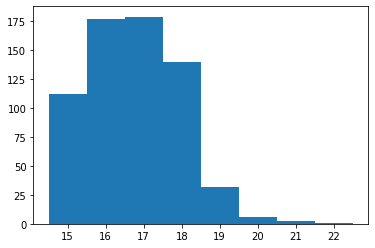

In [ ]:
plt.hist(por['age'], bins=np.arange(por['age'].min(), por['age'].max()+2)-0.5)

In [3]:
def nbox_plot(names, size):
  plt.figure(figsize=(16,12))
  for i,name in enumerate(names):
    plt.subplot(size[0], size[1], i+1)
    sns.boxplot(x=name, y='G3', data=por)
    plt.tight_layout()


Family-related features

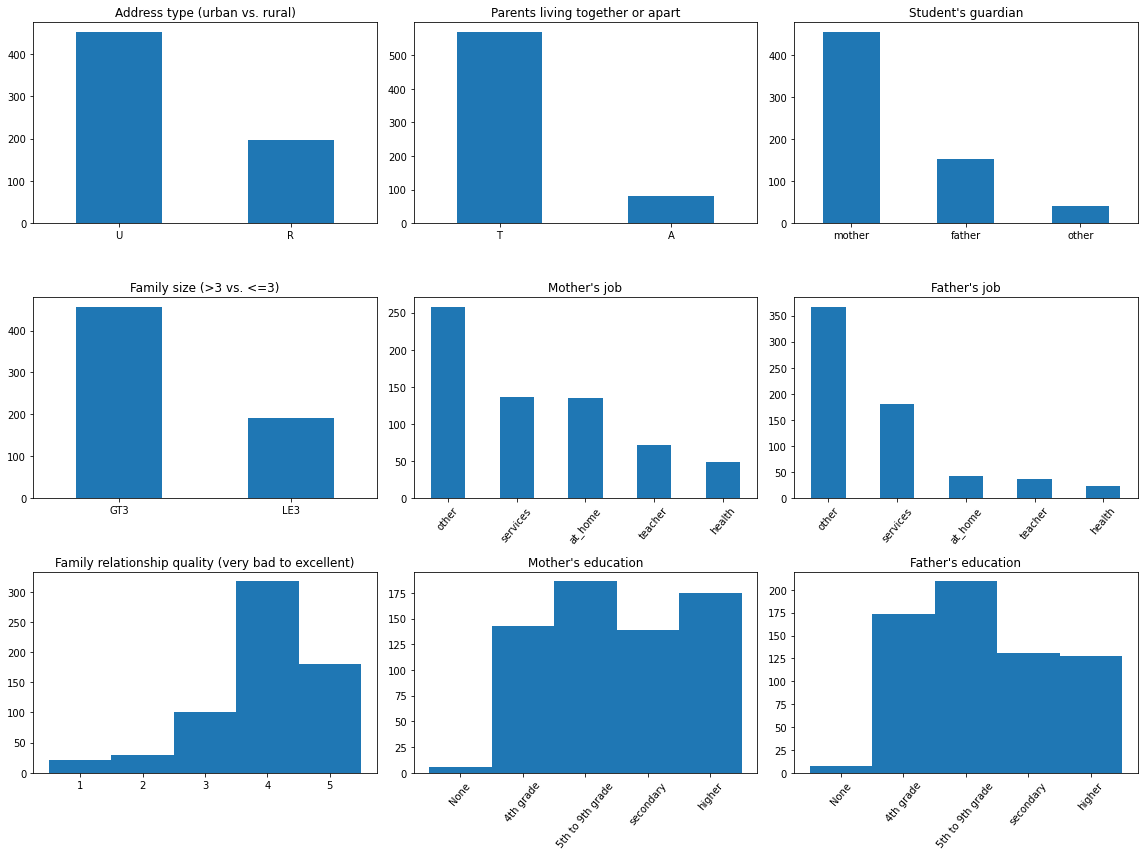

In [ ]:
plt.figure(figsize=(16,12))

plt.subplot(3,3,1)
por['address'].value_counts().plot(kind='bar')
plt.title("Address type (urban vs. rural)")
plt.xticks(rotation=0)
plt.tight_layout() 

plt.subplot(3,3,2)
por['Pstatus'].value_counts().plot(kind='bar')
plt.title("Parents living together or apart")
plt.xticks(rotation=0)
plt.tight_layout() 

plt.subplot(3,3,3)
por['guardian'].value_counts().plot(kind='bar')
plt.title("Student's guardian")
plt.xticks(rotation=0)
plt.tight_layout() 

plt.subplot(3,3,4)
por['famsize'].value_counts().plot(kind='bar')
plt.title("Family size (>3 vs. <=3)")
plt.xticks(rotation=0)
plt.tight_layout() 

plt.subplot(3,3,5)
por['Mjob'].value_counts().plot(kind='bar')
plt.title("Mother's job")
plt.xticks(rotation=50)
plt.tight_layout() 

plt.subplot(3,3,6)
por['Fjob'].value_counts().plot(kind='bar')
plt.title("Father's job")
plt.xticks(rotation=50)
plt.tight_layout() 

plt.subplot(3,3,7)
plt.hist(por['famrel'], bins=np.arange(por['famrel'].min(), por['famrel'].max()+2)-0.5)
plt.title("Family relationship quality (very bad to excellent)")
plt.tight_layout() 

xt = ('None','4th grade','5th to 9th grade', 'secondary','higher')

plt.subplot(3,3,8)
plt.hist(por['Medu'], bins=np.arange(por['Medu'].min(), por['Medu'].max()+2)-0.5)
plt.xticks(ticks=np.arange(len(xt)), labels=xt, rotation=50)
plt.title("Mother's education")
plt.tight_layout() 

plt.subplot(3,3,9)
plt.hist(por['Fedu'], bins=np.arange(por['Fedu'].min(), por['Fedu'].max()+2)-0.5)
plt.xticks(ticks=np.arange(len(xt)), labels=xt, rotation=50)
plt.title("Father's education")
plt.tight_layout() 

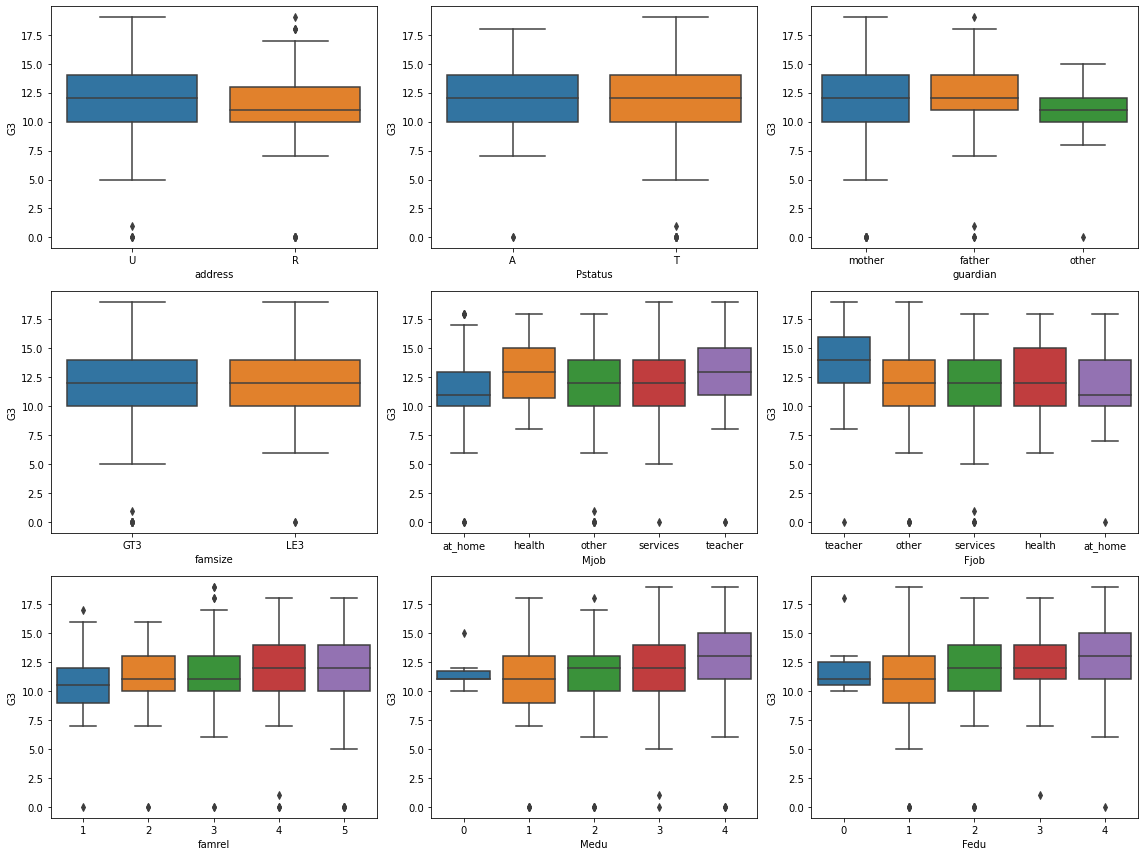

In [ ]:
nbox_plot(['address','Pstatus','guardian','famsize','Mjob','Fjob','famrel', 'Medu','Fedu'],(3,3))

School-related features

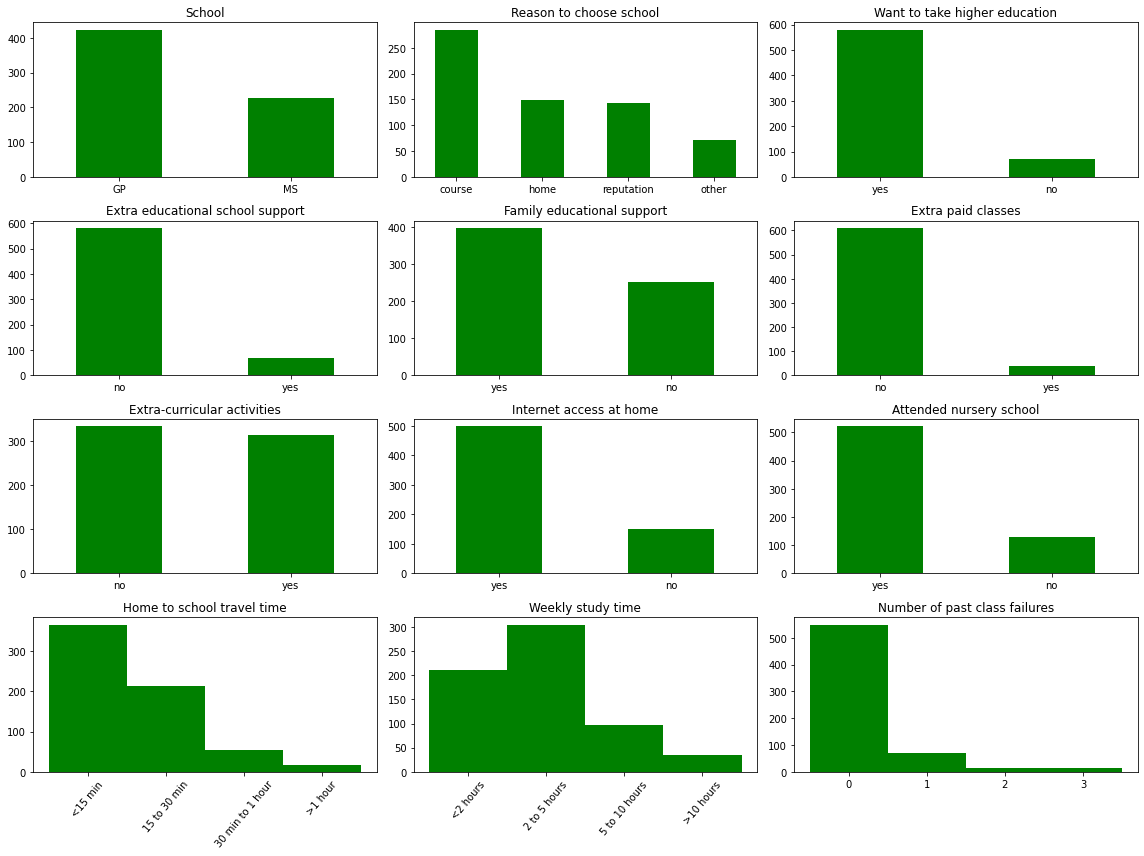

In [ ]:
plt.figure(figsize=(16,12))

plt.subplot(4,3,1)
por['school'].value_counts().plot(kind='bar', color='green')
plt.title("School")
plt.xticks(rotation=0)
plt.tight_layout() 

plt.subplot(4,3,2)
por['reason'].value_counts().plot(kind='bar', color='green')
plt.title("Reason to choose school")
plt.xticks(rotation=0)
plt.tight_layout() 

plt.subplot(4,3,3)
por['higher'].value_counts().plot(kind='bar', color='green')
plt.title("Want to take higher education")
plt.xticks(rotation=0)
plt.tight_layout() 

plt.subplot(4,3,4)
por['schoolsup'].value_counts().plot(kind='bar', color='green')
plt.title("Extra educational school support")
plt.xticks(rotation=0)
plt.tight_layout() 

plt.subplot(4,3,5)
por['famsup'].value_counts().plot(kind='bar', color='green')
plt.title("Family educational support")
plt.xticks(rotation=0)
plt.tight_layout() 

plt.subplot(4,3,6)
por['paid'].value_counts().plot(kind='bar', color='green')
plt.title("Extra paid classes")
plt.xticks(rotation=0)
plt.tight_layout() 

plt.subplot(4,3,7)
por['activities'].value_counts().plot(kind='bar', color='green')
plt.title("Extra-curricular activities")
plt.xticks(rotation=0)
plt.tight_layout() 

plt.subplot(4,3,8)
por['internet'].value_counts().plot(kind='bar', color='green')
plt.title("Internet access at home")
plt.xticks(rotation=0)
plt.tight_layout() 

plt.subplot(4,3,9)
por['nursery'].value_counts().plot(kind='bar', color='green')
plt.title("Attended nursery school")
plt.xticks(rotation=0)
plt.tight_layout() 

xt1 = ('<15 min','15 to 30 min','30 min to 1 hour','>1 hour')
plt.subplot(4,3,10)
plt.hist(por['traveltime'], bins=np.arange(por['traveltime'].min(), por['traveltime'].max()+2)-0.5, color='green')
plt.xticks(ticks=np.arange(1,5), labels=xt1, rotation=50)
plt.title("Home to school travel time")
plt.tight_layout() 

xt2 = ('<2 hours','2 to 5 hours','5 to 10 hours','>10 hours')
plt.subplot(4,3,11)
plt.hist(por['studytime'], bins=np.arange(por['studytime'].min(), por['studytime'].max()+2)-0.5, color='green')
plt.xticks(ticks=np.arange(1,5), labels=xt2, rotation=50)
plt.title("Weekly study time")
plt.tight_layout() 

xt3 = ('0','1','2','3')
plt.subplot(4,3,12)
plt.hist(por['failures'], bins=np.arange(por['failures'].min(), por['failures'].max()+2)-0.5, color='green')
plt.xticks(ticks=np.arange(len(xt3)), labels=xt3)
plt.title("Number of past class failures")
plt.tight_layout() 

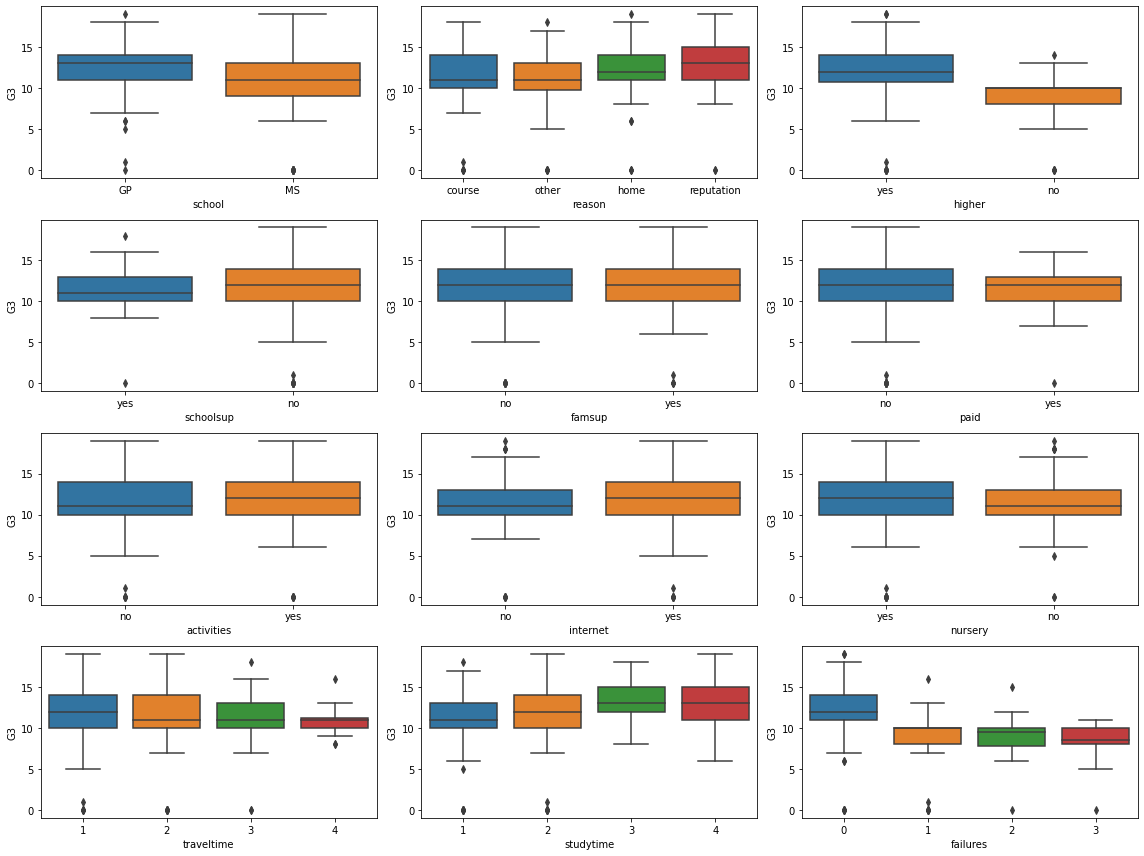

In [ ]:
nbox_plot(['school','reason','higher','schoolsup','famsup','paid','activities','internet','nursery','traveltime','studytime','failures'],(4,3))

Personal features

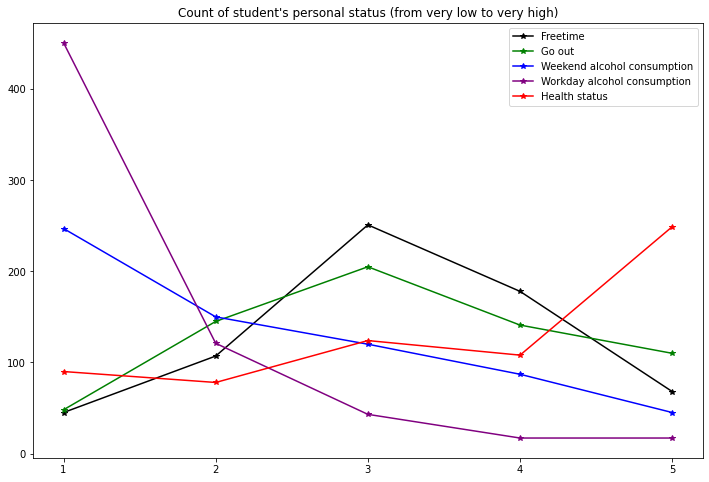

In [ ]:
plt.figure(figsize=(12,8))

y1, ed1 = np.histogram(por['freetime'], bins = np.arange(1,7)-0.5)
cen1 = 0.5*(ed1[1:]+ed1[:-1])
plt.plot(cen1, y1, '*-', c='black', label='Freetime')
y2, ed2 = np.histogram(por['goout'], bins = np.arange(1,7)-0.5)
cen2 = 0.5*(ed2[1:]+ed2[:-1])
plt.plot(cen2, y2, '*-', c='green', label='Go out')
y3, ed3 = np.histogram(por['Walc'], bins = np.arange(1,7)-0.5)
cen3 = 0.5*(ed3[1:]+ed3[:-1])
plt.plot(cen3, y3, '*-', c='blue', label='Weekend alcohol consumption')
y4, ed4 = np.histogram(por['Dalc'], bins = np.arange(1,7)-0.5)
cen4 = 0.5*(ed4[1:]+ed4[:-1])
plt.plot(cen4, y4, '*-', c='purple', label='Workday alcohol consumption')
y5, ed5 = np.histogram(por['health'], bins = np.arange(1,7)-0.5)
cen5 = 0.5*(ed5[1:]+ed5[:-1])
plt.plot(cen5, y5, '*-', c='red', label='Health status')
plt.legend()
plt.xticks(ticks=np.arange(1,6))
plt.title("Count of student's personal status (from very low to very high)")
plt.show()


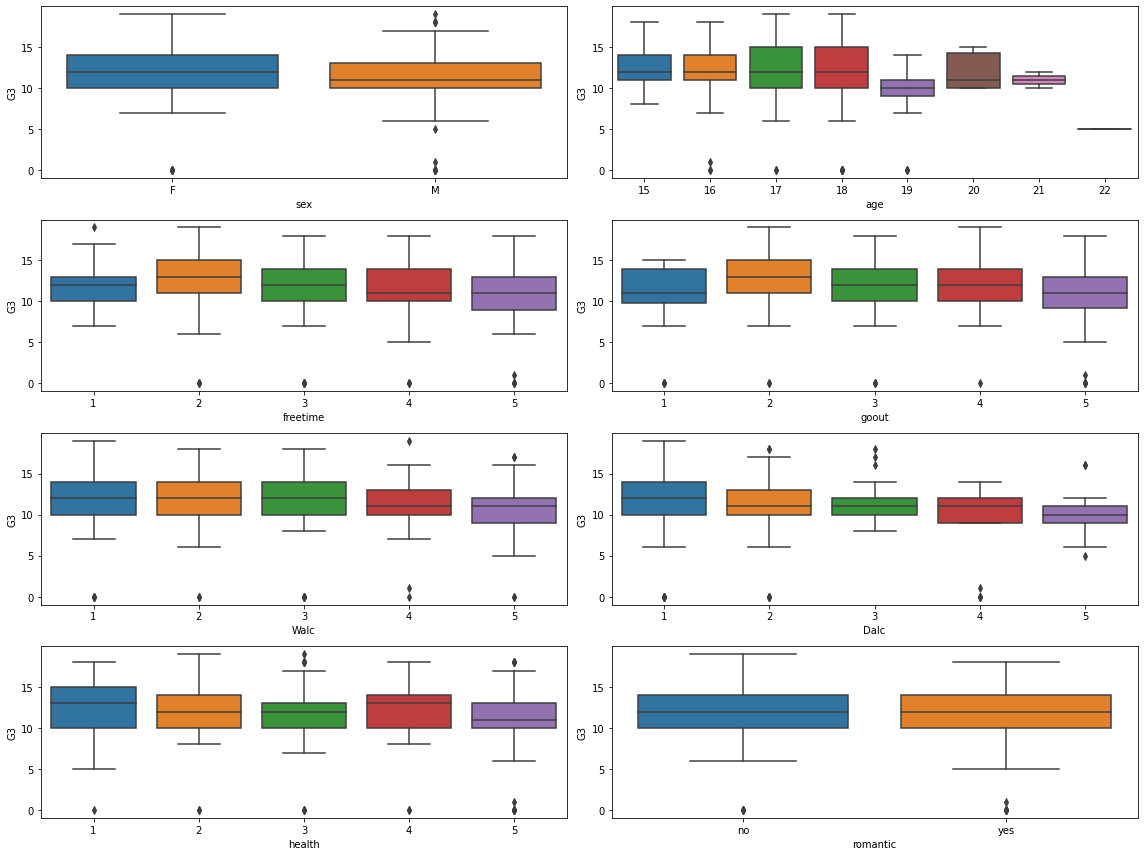

In [ ]:
nbox_plot(['sex','age','freetime','goout','Walc','Dalc','health','romantic'],(4,2))

School absences

In [ ]:
por['absences'].describe()

count    649.000000
mean       3.659476
std        4.640759
min        0.000000
25%        0.000000
50%        2.000000
75%        6.000000
max       32.000000
Name: absences, dtype: float64

Text(0.5, 1.0, 'Count of school absence numbers')

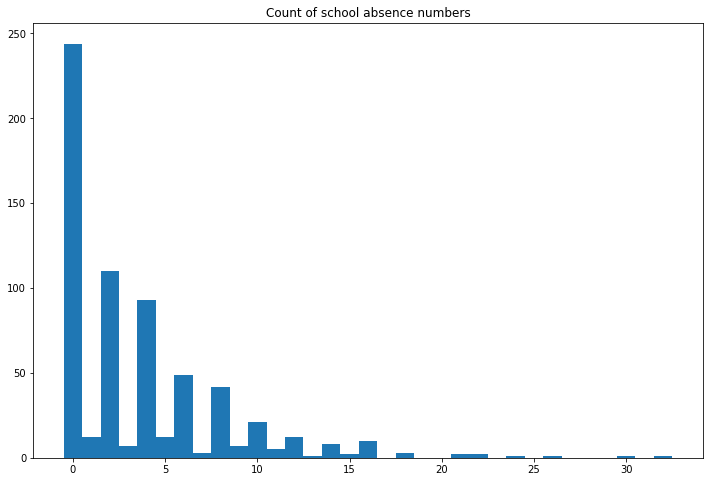

In [ ]:
plt.figure(figsize=(12,8))
plt.hist(por['absences'], bins=np.arange(0,34)-0.5)
plt.title('Count of school absence numbers')

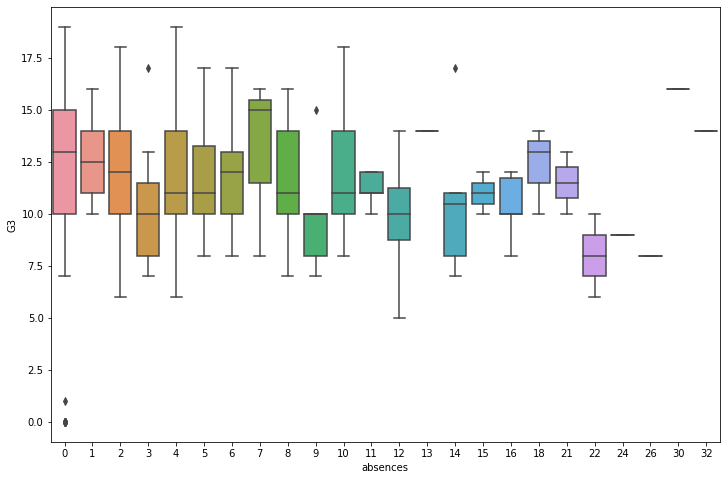

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='absences',y='G3', data=por)

Student grade

Text(0.5, 1.0, 'Student grades count')

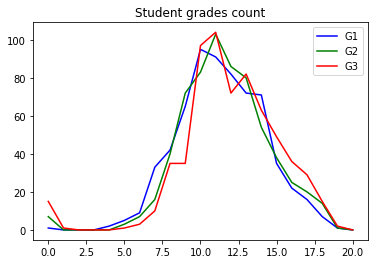

In [ ]:
y1, ed1 = np.histogram(por['G1'], bins = np.arange(0,22)-0.5)
cen1 = 0.5*(ed1[1:]+ed1[:-1])
plt.plot(cen1, y1, '-', c='blue', label='G1')
y2, ed2 = np.histogram(por['G2'], bins = np.arange(0,22)-0.5)
cen2 = 0.5*(ed2[1:]+ed2[:-1])
plt.plot(cen2, y2, '-', c='green', label='G2')
y3, ed3 = np.histogram(por['G3'], bins = np.arange(0,22)-0.5)
cen3 = 0.5*(ed3[1:]+ed3[:-1])
plt.plot(cen3, y3, '-', c='red', label='G3')
plt.legend()
plt.title("Student grades count")

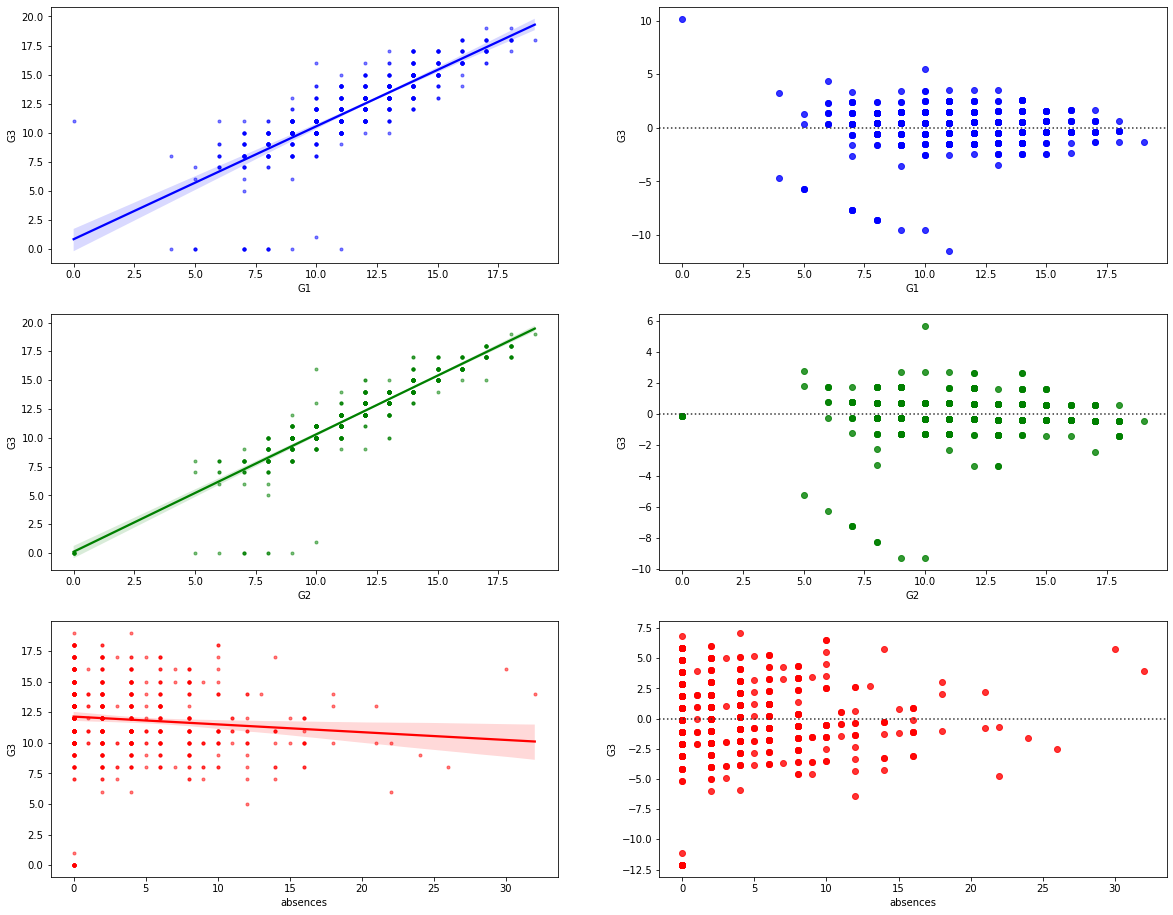

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(20,16))

sns.regplot(y='G3', x='G1', data=por, ax=axes[0,0], color='blue', marker='.',scatter_kws={"alpha":0.5}, line_kws={"alpha":1})
sns.regplot(y='G3', x='G2', data=por, ax=axes[1,0], color='green', marker='.',scatter_kws={"alpha":0.5}, line_kws={"alpha":1})
sns.regplot(y='G3', x='absences', data=por, ax=axes[2,0], color='red', marker='.',scatter_kws={"alpha":0.5}, line_kws={"alpha":1})
sns.residplot(y='G3', x='G1', data=por, ax=axes[0,1], color = 'blue')
sns.residplot(y='G3', x='G2', data=por, ax=axes[1,1], color = 'green')
sns.residplot(y='G3', x='absences', data=por, ax=axes[2,1], color = 'red')

# From categorical to numeric

In [ ]:
por2 = pd.DataFrame(columns=por.columns)
for col in por.columns:
  if (por[col].dtype=='object'):
    por2[col] = pd.factorize(por[col], sort=True)[0]
  else:
    por2[col] = por[col]

In [ ]:
por2

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,0,11,11
1,0,0,17,1,0,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,9,11,11
2,0,0,15,1,1,1,1,1,0,2,2,1,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,12,13,12
3,0,0,15,1,0,1,4,2,1,3,1,1,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0,14,14,14
4,0,0,16,1,0,1,3,3,2,2,1,0,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,0,0,1,2,3,3,2,0,1,1,3,1,0,0,0,1,0,1,1,0,5,4,2,1,2,5,4,10,11,10
645,1,0,18,1,1,1,3,1,4,3,0,1,1,2,0,0,1,0,0,1,1,1,0,4,3,4,1,1,1,4,15,15,16
646,1,0,18,1,0,1,1,1,2,2,0,1,2,2,0,0,0,0,1,1,1,0,0,1,1,1,1,1,5,6,11,12,9
647,1,1,17,1,1,1,3,1,3,3,0,1,2,1,0,0,0,0,0,0,1,1,0,2,4,5,3,4,2,6,10,10,10


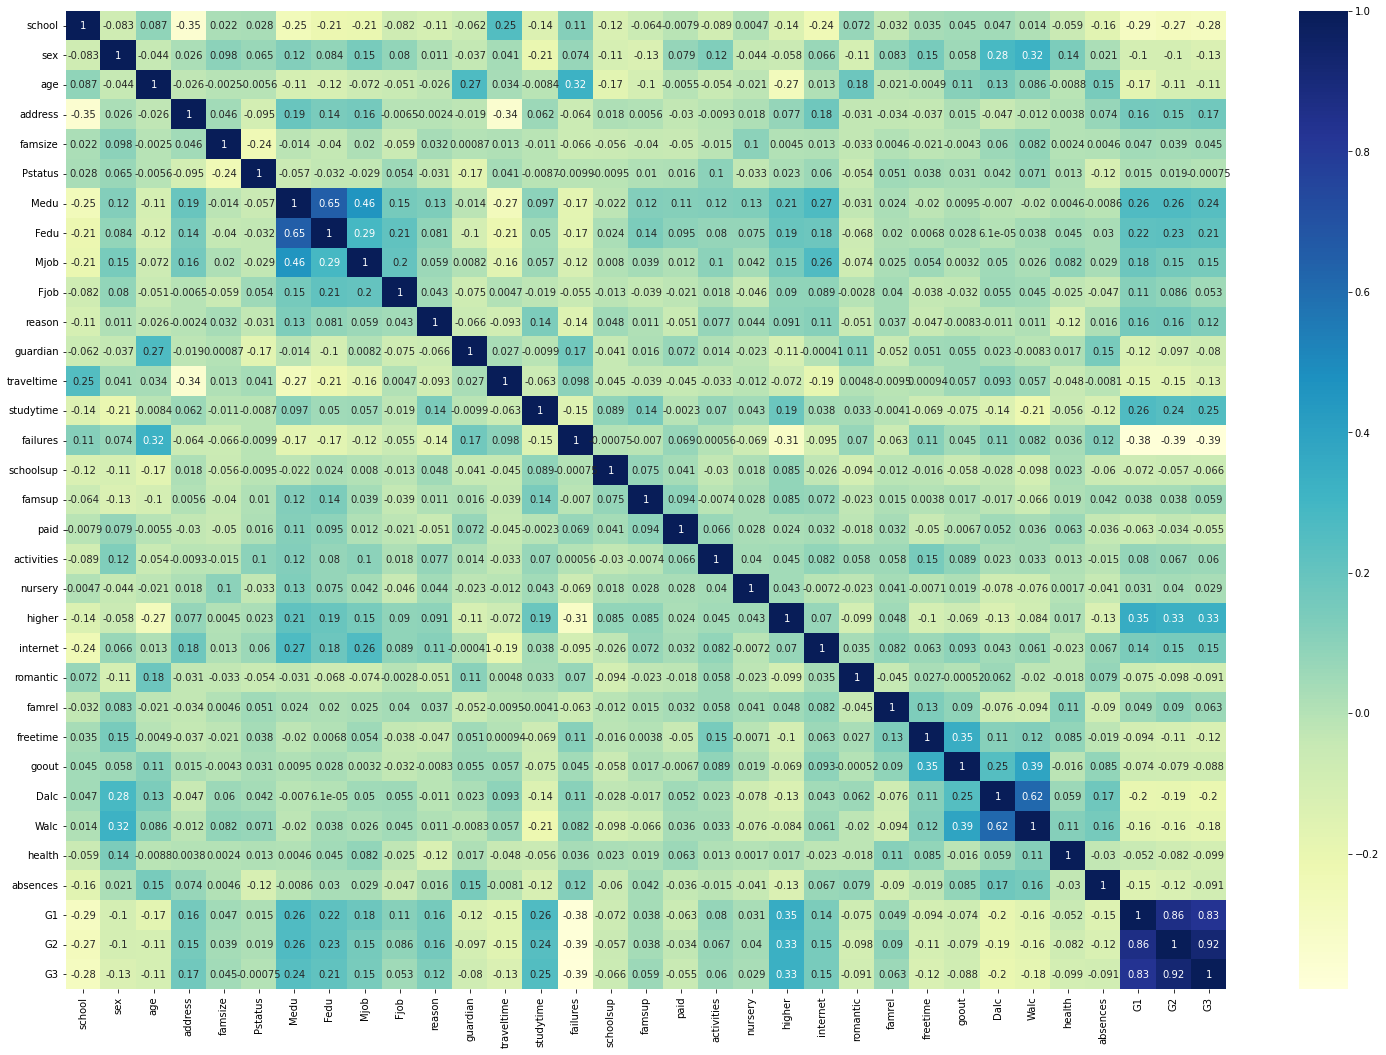

In [ ]:
plt.figure(figsize=(26,18))
sns.heatmap(por2.corr(),cmap="YlGnBu", annot=True)

In [ ]:
por['Dalc'].value_counts()

1    451
2    121
3     43
5     17
4     17
Name: Dalc, dtype: int64

### Combining attributes for school attributes

In [4]:
school_atts_data = por[["school", "reason", "traveltime", "studytime", "failures", "schoolsup", "famsup", "activities", "paid", "internet", "nursery", "higher", "G3"]]

### Combining attributes for family attributes

In [5]:
family_atts_data = por[["address", "Pstatus", "Medu", "Mjob", "Fedu", "Fjob", "guardian", "famsize", "famrel", "G3"]]

In [9]:
pstatus_famsize_df = family_atts_data[["Pstatus", "famsize", "G3"]]

In [10]:
pstatus_famsize_df

,Pstatus,famsize,G3
0,A,GT3,11
1,T,GT3,11
2,T,LE3,12
3,T,GT3,14
4,T,GT3,13
...,...,...,...
644,T,GT3,10
645,T,LE3,16
646,T,GT3,9
647,T,LE3,10


In [14]:
pstatus_famsize_df.loc[:, "Pstatus-famsize"] = pstatus_famsize_df.loc[:, "Pstatus"] + "_" + pstatus_famsize_df.loc[:, "famsize"]

/home/nguyennghiauit/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [15]:
pstatus_famsize_df.sample(10)

,Pstatus,famsize,G3,Pstatus-famsize
422,T,GT3,13,T_GT3
536,A,LE3,14,A_LE3
349,T,GT3,18,T_GT3
580,T,GT3,10,T_GT3
562,T,LE3,12,T_LE3
430,A,GT3,11,A_GT3
67,T,GT3,10,T_GT3
640,T,GT3,0,T_GT3
309,T,GT3,14,T_GT3
142,T,LE3,12,T_LE3


<AxesSubplot:xlabel='Pstatus-famsize', ylabel='G3'>

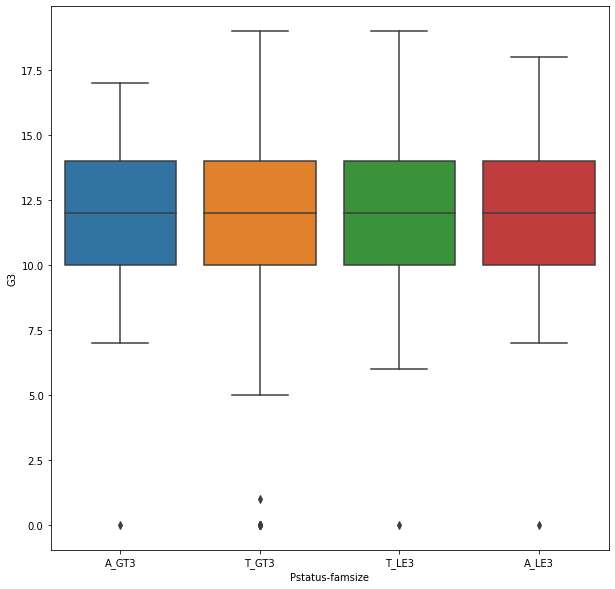

In [23]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=pstatus_famsize_df, x="Pstatus-famsize", y="G3")

In [24]:
address_famsize_df = por[["address", "famsize", "G3"]]
address_famsize_df.sample(10)

,address,famsize,G3
336,U,GT3,16
600,R,GT3,14
262,R,LE3,8
153,U,GT3,13
145,U,GT3,10
197,U,LE3,14
300,U,GT3,15
325,U,LE3,10
509,R,LE3,18
193,U,GT3,13


In [26]:
address_famsize_df.loc[:, "address-famsize"] = address_famsize_df.loc[:, "address"] + "_" + address_famsize_df.loc[:, "famsize"]

/home/nguyennghiauit/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [27]:
address_famsize_df.sample(10)

,address,famsize,G3,address-famsize
247,U,GT3,14,U_GT3
182,U,GT3,13,U_GT3
137,U,GT3,11,U_GT3
275,U,GT3,11,U_GT3
213,U,LE3,11,U_LE3
174,R,LE3,9,R_LE3
32,R,GT3,15,R_GT3
638,U,GT3,16,U_GT3
373,R,LE3,10,R_LE3
119,U,GT3,14,U_GT3


<AxesSubplot:xlabel='address-famsize', ylabel='G3'>

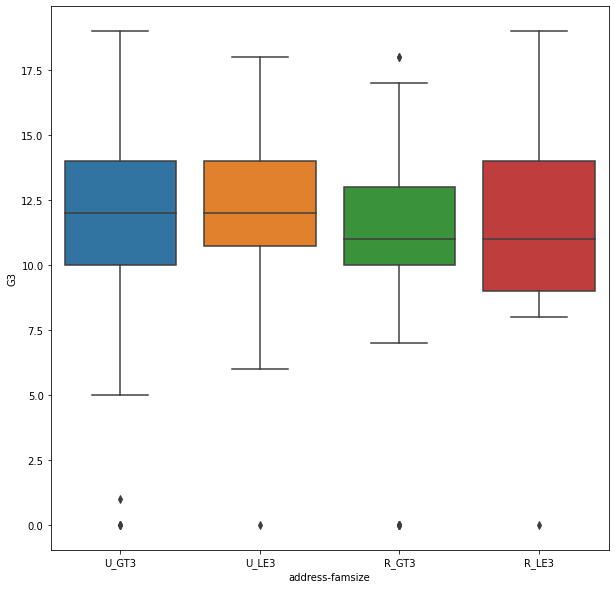

In [29]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=address_famsize_df, x="address-famsize", y="G3")